In [20]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import re
from scipy.stats import f_oneway


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

In [5]:
df = pd.read_csv("FXS x TSC_data_exported_trials_20250801.csv")
df.head()

,Time_since_file_start_(s),Stim_ID,Trial_type,Attempts_to_complete,Response,Reaction_(s),Type,Stim Source,Position,Dur (ms),...,complete_block_number,UUID,date,rat_name,rat_ID,Genotype,file_name,phase,task,detail
0,96.464997,5,5,12,Hit,0.197487,5,train,5,5300,...,1.0,20230117122826_96.4649967849255_1.49607365505489,20230117,Blue1,98,LE,32kHz_60dB_BBN_60dB_8s_4-6,Tone-BBN,CNO 3mg/kg,4-6
1,96.464997,5,5,12,Hit,0.197487,5,train,5,5300,...,1.0,20230117122826_96.4649967849255_1.49607365505489,20230117,Blue1,98,LE,32kHz_60dB_BBN_60dB_8s_4-6,Tone-BBN,CNO 3mg/kg,4-6
2,96.464997,5,5,12,Hit,0.197487,5,train,5,5300,...,1.0,20230117122826_96.4649967849255_1.49607365505489,20230117,Blue1,98,LE,32kHz_60dB_BBN_60dB_8s_4-6,Tone-BBN,CNO 3mg/kg,4-6
3,107.651005,4,5,2,Hit,0.224997,5,train,4,5300,...,1.0,20230117122826_96.4649967849255_1.49607365505489,20230117,Blue1,98,LE,32kHz_60dB_BBN_60dB_8s_4-6,Tone-BBN,CNO 3mg/kg,4-6
4,107.651005,4,5,2,Hit,0.224997,5,train,4,5300,...,1.0,20230117122826_96.4649967849255_1.49607365505489,20230117,Blue1,98,LE,32kHz_60dB_BBN_60dB_8s_4-6,Tone-BBN,CNO 3mg/kg,4-6


In [7]:
df.columns

Index(['Time_since_file_start_(s)', 'Stim_ID', 'Trial_type',
       'Attempts_to_complete', 'Response', 'Reaction_(s)', 'Type',
       'Stim Source', 'Position', 'Dur (ms)', 'Nose Out TL (s)',
       'Time Out (s)', 'Train Setting', 'Extra Check Point (s)', 'Delay (s)',
       'Trial_number', 'Block_number', 'complete_block_number', 'UUID', 'date',
       'rat_name', 'rat_ID', 'Genotype', 'file_name', 'phase', 'task',
       'detail'],
      dtype='object')

In [8]:
df.dtypes

Time_since_file_start_(s)    float64
Stim_ID                        int64
Trial_type                     int64
Attempts_to_complete           int64
Response                      object
Reaction_(s)                 float64
Type                           int64
Stim Source                   object
Position                       int64
Dur (ms)                       int64
Nose Out TL (s)              float64
Time Out (s)                   int64
Train Setting                 object
Extra Check Point (s)        float64
Delay (s)                    float64
Trial_number                   int64
Block_number                   int64
complete_block_number        float64
UUID                          object
date                           int64
rat_name                      object
rat_ID                         int64
Genotype                      object
file_name                     object
phase                         object
task                          object
detail                        object
d

In [ ]:
print(df.head())
print(df.info())
print(df['Genotype'].value_counts())

   Time_since_file_start_(s)  Stim_ID  Trial_type  Attempts_to_complete  \
0                  96.464997        5           5                    12   
1                  96.464997        5           5                    12   
2                  96.464997        5           5                    12   
3                 107.651005        4           5                     2   
4                 107.651005        4           5                     2   

  Response  Reaction_(s)  Type Stim Source  Position  Dur (ms)  ...  \
0      Hit      0.197487     5       train         5      5300  ...   
1      Hit      0.197487     5       train         5      5300  ...   
2      Hit      0.197487     5       train         5      5300  ...   
3      Hit      0.224997     5       train         4      5300  ...   
4      Hit      0.224997     5       train         4      5300  ...   

   complete_block_number                                              UUID  \
0                    1.0  20230117122826_96.

In [14]:
# Binary variable: first attempt success = 1 attempt
df['first_attempt_success'] = df['Attempts_to_complete'].apply(lambda x: "Yes" if x == 1 else "No")

# Check counts
print(df['first_attempt_success'].value_counts())

first_attempt_success
Yes    1064015
No      737619
Name: count, dtype: int64


In [15]:
contingency_table = pd.crosstab(df['Genotype'], df['first_attempt_success'])
print(contingency_table)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Effect size: Cramer's V
n = contingency_table.sum().sum()
cramers_v = (chi2 / (n * (min(contingency_table.shape) - 1))) ** 0.5
print("Cramer's V:", cramers_v)

first_attempt_success      No     Yes
Genotype                             
LE                     588913  682043
Tsc2_LE_WT             148706  381972
Chi-square test statistic: 51930.70592552339
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[520350.57828838 750605.42171162]
 [217268.42171162 313409.57828838]]
Cramer's V: 0.16977698957411883


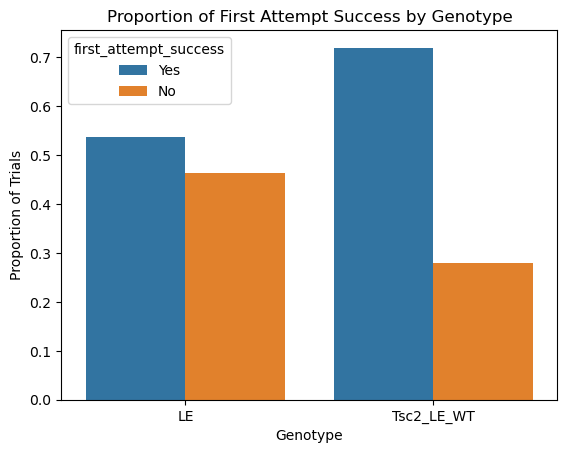

In [16]:
success_rates = df.groupby('Genotype')['first_attempt_success'].value_counts(normalize=True).rename('proportion').reset_index()

sns.barplot(data=success_rates, x='Genotype', y='proportion', hue='first_attempt_success')
plt.title("Proportion of First Attempt Success by Genotype")
plt.ylabel("Proportion of Trials")
plt.show()

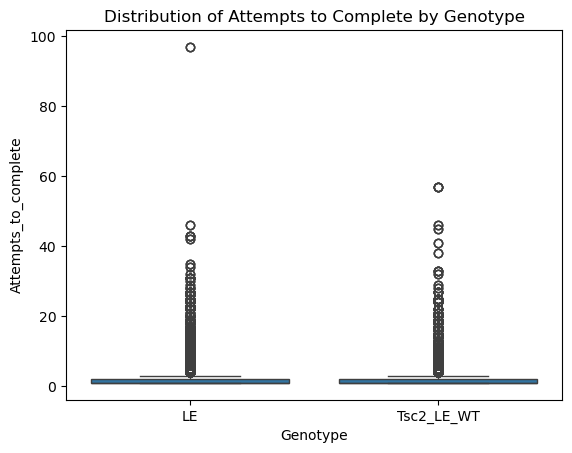

In [18]:
sns.boxplot(data=df, x='Genotype', y='Attempts_to_complete')
plt.title("Distribution of Attempts to Complete by Genotype")
plt.show()

In [21]:
# Step 2: Helper functions

def load_data(file_path, info_path):
    df = pd.read_csv(file_path)
    info_df = pd.read_csv(info_path)
    return df, info_df

def file_info(info_df):
    df = info_df[['file_name','UUID']]
    file_name_list = list(zip(df['file_name'], df['UUID']))
    file_info_list = [(file_name.split('_'), uuid) for file_name,uuid in file_name_list]
    file_info = [(tup[:-1],tup[-1]) for tup in file_info_list]
    file_uuid_list = [t[1] for t in file_info]
    file_info_df = pd.DataFrame(file_info, columns=['file_info','UUID'])
    merged_df = pd.merge(file_info_df, info_df, on="UUID", how="right")
    return merged_df[merged_df['UUID'].isin(file_uuid_list)]

def uuid_comparer(df, info_df):
    valid_UUIDs_set = set(info_df['UUID'])
    data_UUIDs_set = set(df['UUID'])
    return valid_UUIDs_set.intersection(data_UUIDs_set)

def round_delay(x):
    return np.round(x * 2) / 2

def data_cleaner(df, info_df, shared_UUIDs, wanted_columns):
    merged_df = pd.merge(df, info_df[wanted_columns], on="UUID", how="right")
    clean_df = merged_df[merged_df['UUID'].isin(shared_UUIDs)]
    clean_df = clean_df[clean_df['complete_block_number'] > 1]
    return clean_df

def delay_classifier(df):
    wanted_data = df[['Delay (s)','UUID']]
    delay_max_min_by_UUID = wanted_data.groupby(['UUID']).agg(['max','min'])
    rounded_delays = delay_max_min_by_UUID['Delay (s)'].map(round_delay)
    delay_intervals = rounded_delays.groupby(['max','min']).count()
    delay_interval_list = delay_intervals.index.tolist()
    
    df_with_classified_delays = pd.merge(df, rounded_delays, on='UUID', how='right')
    df_with_classified_delays = df_with_classified_delays.rename(columns={"max": "Max Delay (s)", "min": "Min Delay (s)"})
    
    return delay_interval_list, df_with_classified_delays

def rat_info(df, delay_interval): 
    df = df.loc[(df['Max Delay (s)'] == delay_interval[0])
                & (df['Min Delay (s)'] == delay_interval[1])
                & (df['Delay (s)'] > 2.5)]
    
    df['one_attempt'] = df['Attempts_to_complete'] == 1
    df['more_than_one_attempt'] = df['Attempts_to_complete'] > 1
    
    groups = df.groupby(['rat_ID', 'Genotype']).agg(
        trials_one_attempt=('one_attempt', 'sum'),
        trials_more_than_one_attempt=('more_than_one_attempt', 'sum'),
        total_trials=('Attempts_to_complete', 'count'))
    
    groups['prop_one_attempt'] = groups['trials_one_attempt'] / groups['total_trials']
    return groups.reset_index()

def genotype_bargraph(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.swarmplot(x='Genotype', y='prop_one_attempt', data=data, color='black', size=5)
    plt.title('Proportion of 1-Attempt Trials by Genotype')
    plt.ylabel('Proportion of Trials Completed in One Attempt')
    plt.xlabel('Genotype')
    plt.show()

In [24]:
# Step 3: Load data
file_path = "FXS x TSC_archive.csv"
file_info_path = "FXS x TSC_data_exported_20250801.csv"

wanted_columns_for_merge = ['date','UUID','weight','rat_ID','DOB','file_name','Genotype']
wanted_delay_interval = (4.0,1.0)  # adjust as needed

df, info_df = load_data(file_path, file_info_path)
info_df = file_info(info_df)
shared_UUIDs = uuid_comparer(df, info_df)
clean_df = data_cleaner(df, info_df, shared_UUIDs, wanted_columns_for_merge)
delay_interval_list, delay_df = delay_classifier(clean_df)

rat_data = rat_info(delay_df, wanted_delay_interval)
rat_data.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20080\1552023079.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['one_attempt'] = df['Attempts_to_complete'] == 1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20080\1552023079.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['more_than_one_attempt'] = df['Attempts_to_complete'] > 1


,rat_ID,Genotype,trials_one_attempt,trials_more_than_one_attempt,total_trials,prop_one_attempt
0,744,Fmr1_KO-Tsc2_WT,21192,3758,24950,0.849379
1,745,Fmr1_KO-Tsc2_WT,2988,2998,5986,0.499165
2,746,Fmr1_WT-Tsc2_Het,22904,10869,33773,0.678175
3,747,Fmr1_WT-Tsc2_WT,24272,10944,35216,0.689232
4,748,Fmr1_KO-Tsc2_Het,22684,11233,33917,0.668809


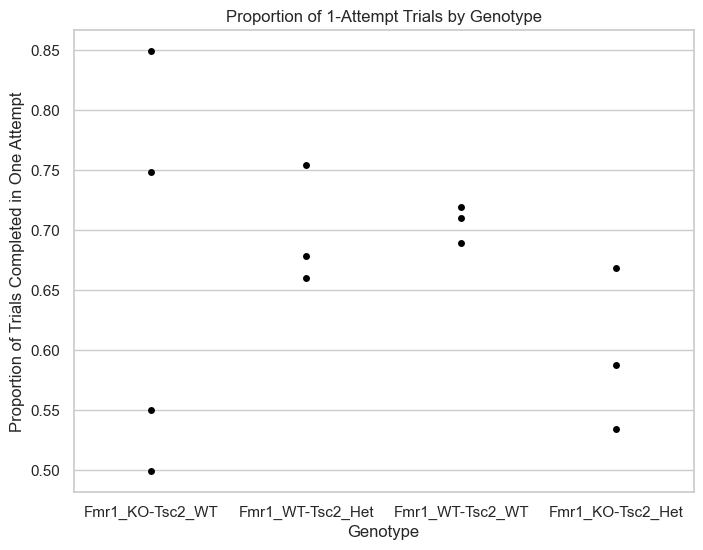

In [25]:
# Step 4: Visualization
genotype_bargraph(rat_data)

Chi-Square Test:
Test whether genotype is associated with success on the first attempt (yes/no).

In [27]:
# Step 5: Chi-Square Test
contingency = pd.pivot_table(rat_data, 
                             values='trials_one_attempt', 
                             index='Genotype', 
                             aggfunc='sum')

# Add more_than_one_attempt counts
contingency['trials_more_than_one_attempt'] = rat_data.groupby('Genotype')['trials_more_than_one_attempt'].sum()
contingency = contingency.astype(int)

chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test results")
print("-----------------------")
print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square test results
-----------------------
Chi2 statistic: 3222.588813292243
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
 [[54248.39495999 25180.60504001]
 [44418.26807108 20617.73192892]
 [54953.91299489 25508.08700511]
 [49267.42397404 22868.57602596]]


If p < 0.05 → Genotype does affect probability of first-attempt success.

Cramér’s V tells us effect size:

0.1 = small, 0.3 = medium, 0.5 = large.

One-Way ANOVA:
When we treat proportion as continuous outcome;
compare mean number of attempts across genotypes.

In [26]:
# Step 6: One-Way ANOVA
groups = [rat_data.loc[rat_data['Genotype']==g, 'prop_one_attempt'] for g in rat_data['Genotype'].unique()]
anova_stat, anova_p = f_oneway(*groups)

print("\nANOVA results")
print("-------------")
print("F-statistic:", anova_stat)
print("p-value:", anova_p)


ANOVA results
-------------
F-statistic: 0.6943406255671655
p-value: 0.5783538338644758


If ANOVA is significant (p < 0.05), do post-hoc tests (Tukey HSD) to see which groups differ.
If ANOVA p < 0.05 → at least one genotype has a different mean attempts-to-complete.

Tukey HSD tells us which pairs are significantly different.

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def compute_sdt_measures(df,
                         subject_col='rat_ID',
                         session_col='UUID',   # optional grouping col
                         go_mask_col='Trial_type', # define what encodes "go" (you may adapt)
                         response_col='Response'):
    """
    Return dataframe with columns: subject, session (if present),
    go_trials, hits, no_go_trials, false_alarms, hit_rate, fa_rate, dprime, criterion
    """
    # define mapping for your data: we assume Trial_type==1 is "go", 0 is "no-go"
    # and Response strings indicate 'hit', 'miss', 'false alarm', 'correct reject'
    # Adjust masks below to match your dataset values.
    
    df['is_go'] = df['Trial_type'] == 1  # adjust if needed
    df['is_hit'] = df['is_go'] & df[response_col].str.lower().str.contains('hit', na=False)
    df['is_fa']  = (~df['is_go']) & df[response_col].str.lower().str.contains('false', na=False)
    
    group_cols = [subject_col]
    if session_col in df.columns:
        group_cols.append(session_col)
    
    agg = df.groupby(group_cols).agg(
        go_trials = ('is_go', 'sum'),
        hits = ('is_hit', 'sum'),
        no_go_trials = (lambda x: (~x).sum(), 'is_go') if False else ('is_go','count') # placeholder
    )
    # easier explicit:
    g = df.groupby(group_cols)
    stats = pd.DataFrame({
        'go_trials': g['is_go'].sum(),
        'hits': g['is_hit'].sum(),
        'no_go_trials': (~g['is_go']).sum(),
        'false_alarms': g['is_fa'].sum()
    }).reset_index()
    
    # calculate rates with adjustments
    stats['hit_rate'] = (stats['hits'] + 0.5) / (stats['go_trials'] + 1)
    stats['fa_rate']  = (stats['false_alarms'] + 0.5) / (stats['no_go_trials'] + 1)
    
    # z transform
    stats['zH'] = stats['hit_rate'].apply(lambda x: norm.ppf(x))
    stats['zF'] = stats['fa_rate'].apply(lambda x: norm.ppf(x))
    stats['dprime'] = stats['zH'] - stats['zF']
    stats['criterion'] = -0.5 * (stats['zH'] + stats['zF'])
    
    return stats
